<a href="https://colab.research.google.com/github/larisa-sukhushina/1-project/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [0]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
classes = ['футболка', 'классические брюки', 'свитер', 'платье', 'классическая юбка', 'туфли', 'рубашка', 'кроссовки', 'шорты', 'спортивные брюки']

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [0]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 
x_test = x_test / 255 

In [0]:
n = 0

In [0]:
print(y_train[n])

9


In [0]:
y_train = utils.to_categorical(y_train, 10)

In [0]:
y_test = utils.to_categorical(y_test, 10)

In [0]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 [==============================] - 4s 16ms/step - loss: 1.1955 - accuracy: 0.6480 - val_loss: 0.8478 - val_accuracy: 0.7293
Epoch 2/100
240/240 [==============================] - 4s 16ms/step - loss: 0.7725 - accuracy: 0.7568 - val_loss: 0.7030 - val_accuracy: 0.7708
Epoch 3/100
240/240 [==============================] - 4s 16ms/step - loss: 0.6706 - accuracy: 0.7888 - val_loss: 0.6330 - val_accuracy: 0.7967
Epoch 4/100
240/240 [==============================] - 4s 16ms/step - loss: 0.6154 - accuracy: 0.8054 - val_loss: 0.5940 - val_accuracy: 0.8111
Epoch 5/100
240/240 [==============================] - 4s 16ms/step - loss: 0.5798 - accuracy: 0.8155 - val_loss: 0.5645 - val_accuracy: 0.8170
Epoch 6/100
240/240 [==============================] - 4s 16ms/step - loss: 0.5541 - accuracy: 0.8213 - val_loss: 0.5429 - val_accuracy: 0.8221
Epoch 7/100
240/240 [==============================] - 4s 16ms/step - loss: 0.5346 - accuracy: 0.8258 - val_loss: 0.5283 - val_accuracy:

In [0]:
model.save('fashion_mnist_dense.h5')

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3795 - accuracy: 0.8642


In [0]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 86.42


In [0]:
n_rec = 496

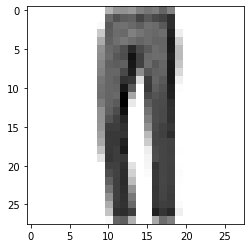

In [0]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [0]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

In [0]:
prediction = model.predict(x)

In [0]:
prediction

array([[4.2530577e-05, 9.9983048e-01, 6.7246633e-06, 1.1047331e-04,
        8.0777181e-06, 3.8574690e-09, 6.1505835e-07, 7.0247928e-08,
        1.0330953e-06, 3.7299692e-09]], dtype=float32)

In [0]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 1
Название класса: классические брюки


In [0]:
files.upload()

KeyboardInterrupt: ignored

In [0]:
!ls

fashion_mnist_dense.h5	sample_data


In [0]:
img_path = 'tshirt.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

In [0]:
plt.imshow(img.convert('RGBA'))
plt.show()

In [0]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

In [0]:
prediction = model.predict(x)

In [0]:
prediction

In [0]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])